In [1]:
#importing liabraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
#importing dataset for analysis.
crop_df=pd.read_csv('crop_production.csv')
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
#checking shape of dataset.
crop_df.shape

(246091, 7)

This dataset has 2,46,091 rows and 7 columns(variables) to analysis.

In [4]:
#checking information about dataset.
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
#5 point summary of dataset.
crop_df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [6]:
#checking null values.
crop_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

From here we can see the production variable has null values contained in it so first we have to find the ratio of this null values then we decide how to treat this null values.

In [7]:
#finding ratio of null values.
crop_df.isnull().sum()/len(crop_df)

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       0.015157
dtype: float64

Here we can see the percentage of null values present in variable is 0.01 so it won't affect data so we can drop it.

In [8]:
#droping null values.
crop_df.dropna(inplace=True)

In [9]:
#checking for null values are they still present or deleted.
crop_df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Now no null values present in the dataset so we have successfully treated null values. now we can move to start EDA of dataset.

#### Exploratory Data Analysis

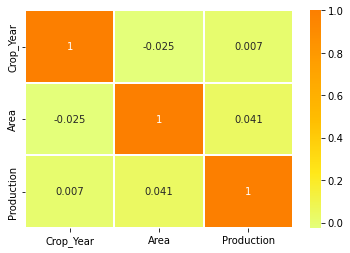

In [10]:
#checking correlation of variables.
sns.heatmap(crop_df.corr(),annot=True,cmap='Wistia',linewidth=0.2)
plt.show()

No strong correlation is present in the numerical variable of dataset.

In [11]:
#sorting states production wise.
state_sort=crop_df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False).head(10)

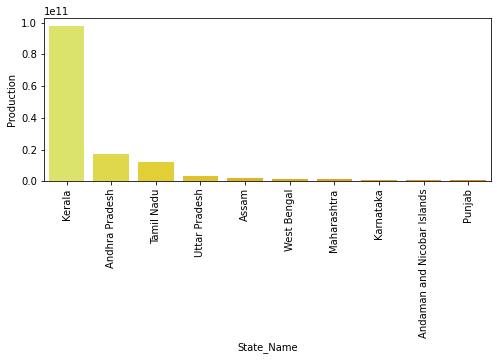

In [12]:
#statewise crop production.
plt.figure(figsize=(8,3))
sns.barplot(x='State_Name',y='Production',data=state_sort,palette='Wistia')
plt.xticks(rotation=90)
plt.show()

In the list of top 10 states,here we can observe that 'Kerala' have highest production in all over the state.

In [13]:
#finding top10 district performance in terms of production.
dist_sort=crop_df.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False).head(10)

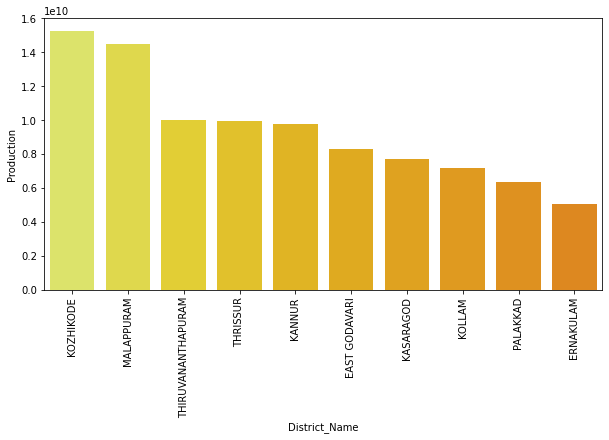

In [14]:
#visualizing top 10 district in terms of production.
plt.figure(figsize=(10,5))
sns.barplot(x='District_Name',y='Production',data=dist_sort,palette='Wistia')
plt.xticks(rotation=90)
plt.show()

* These are the top 10 performing district_names in terms of production and can see that 'Kozhikode' has the highest production
* followed by Mallapuram, thiruvananthapuram.

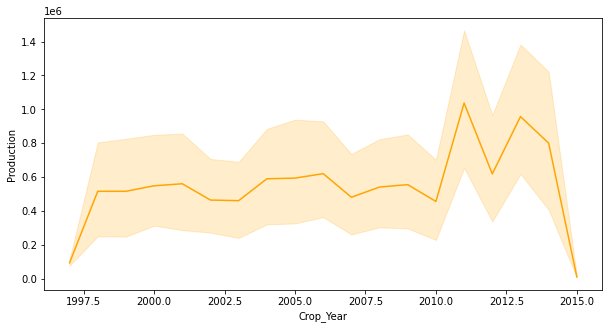

In [15]:
#yearwise production.
plt.figure(figsize=(10,5))
sns.lineplot(x='Crop_Year',y='Production',data=crop_df,color='orange')
plt.show()

From this visualization we can see yearwise production of crops and 2011,2013 was the best performing year in terms of production.

In [16]:
#seasonwise production.
sea_sort=crop_df.sort_values(by='Production',ascending=False)

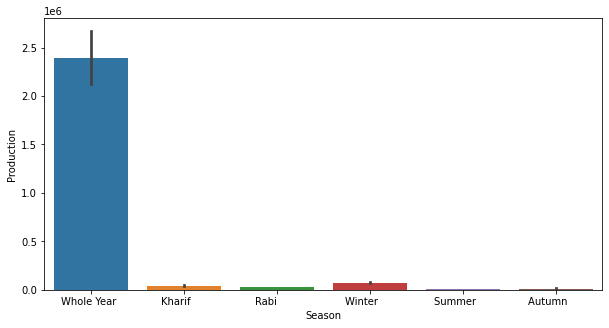

In [17]:
#visualizing production in terms of season.
plt.figure(figsize=(10,5))
sns.barplot(x='Season',y='Production',data=sea_sort)
plt.show()

Here we can observe that winter has maximum production as compare to other season and whole year has the highest production.

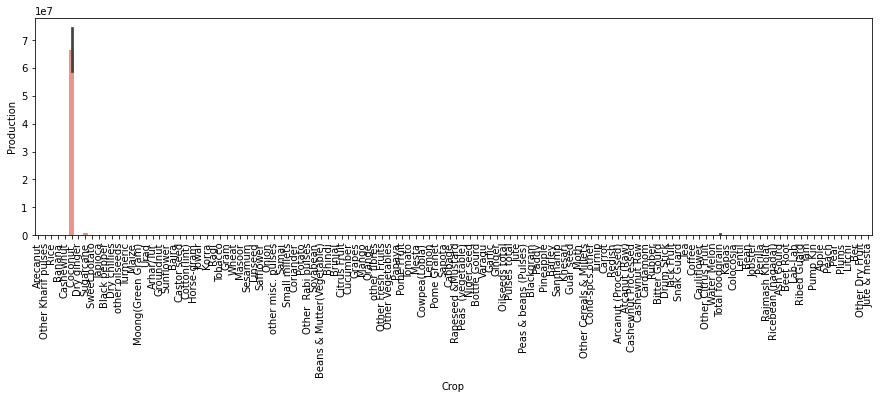

In [18]:
#cropwise production.
plt.figure(figsize=(15,4))
sns.barplot(x='Crop',y='Production',data=crop_df)
plt.xticks(rotation=90)
plt.show()

From here we can observe that coconut has the highest production in all the other crops.

### Cultivation and types of crops

In [19]:
#categorizing crops.
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

In [20]:
#assigning varibale.
crops = crop_df['Crop']
crop_df['cat_crop']=crop_df['Crop'].apply(cat_crop)

In [21]:
#sorting cat_crop columns.
sort_crop = crop_df.groupby('cat_crop')['Production'].count().reset_index().sort_values(by='Production',ascending=False)

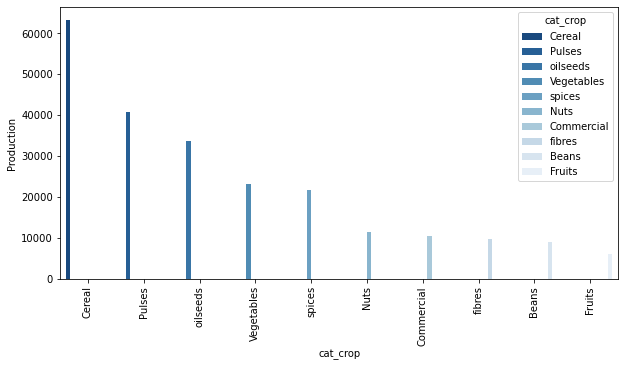

In [22]:
#plotting graph for cat_crop and production.
plt.figure(figsize=(10,5))
sns.barplot(x='cat_crop',y='Production',data=sort_crop,palette='Blues_r',hue='cat_crop')
plt.xticks(rotation=90)
plt.show()

 From above visualization we can see that cereal,pulses and oilseeds have highest production in crop category.

In [23]:
#areawise state.
state_area=crop_df.groupby('State_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending=False)

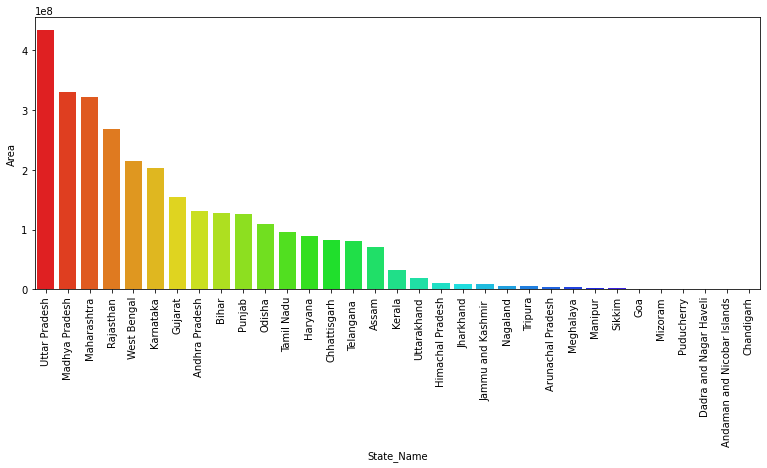

In [24]:
#plotting graph for statewise area.
plt.figure(figsize=(13,5))
sns.barplot(x='State_Name',y='Area',data=state_area,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

* Uttar Pradesh have larger area under agriculture
* followed by Madhya Pradesh and Maharastra
* Chandigarh have the lowest area under agriculter

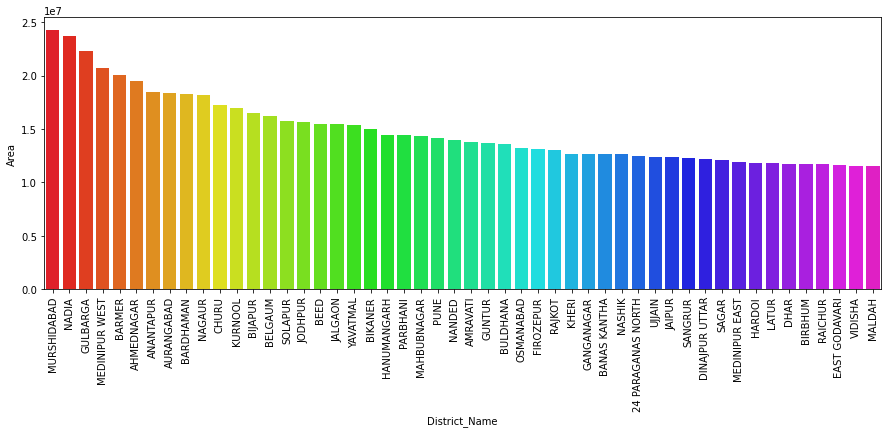

In [25]:
#areawise state.
dist_area=crop_df.groupby('District_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending=False).head(50)

#plotting graph for statewise area.
plt.figure(figsize=(15,5))
sns.barplot(x='District_Name',y='Area',data=dist_area,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

* Murshidabad have larger area under agriculture
* followed by Nadia and Gulbarga

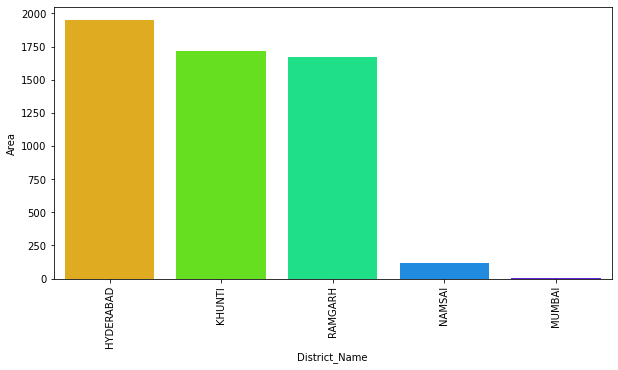

In [26]:
#areawise state.
state_area=crop_df.groupby('District_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending=False).tail()

#plotting graph for statewise area.
plt.figure(figsize=(10,5))
sns.barplot(x='District_Name',y='Area',data=state_area,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

* Least five district name in agricultural land.
* mumbai has the least agricultural land in india.

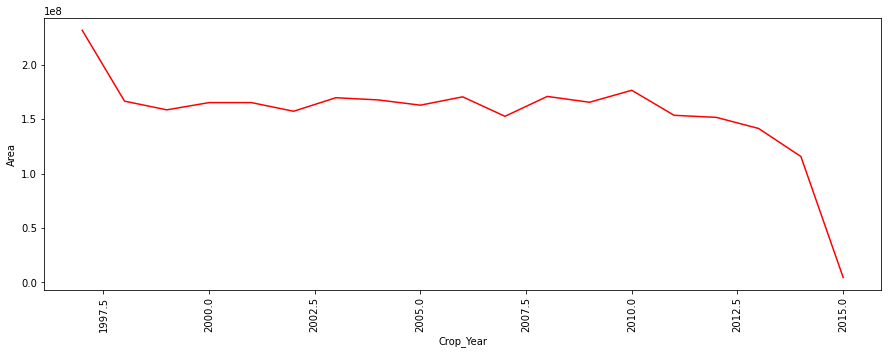

In [27]:
#areawise state.
year_area=crop_df.groupby('Crop_Year')['Area'].sum().reset_index().sort_values(by='Area',ascending=False)

#plotting graph for statewise area.
plt.figure(figsize=(15,5))
sns.lineplot(x='Crop_Year',y='Area',data=year_area,color='red')
plt.xticks(rotation=90)
plt.show()

#### Observations:-
* In the year of 1997 we have largest agricultural area 
* With the passage of time it comtinues to decreasing.

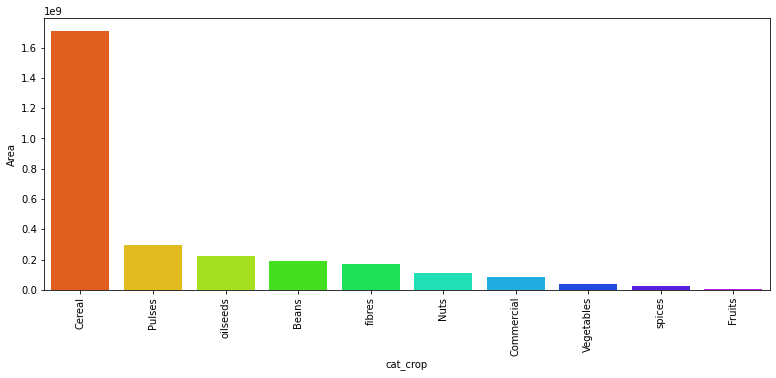

In [28]:
#areawise state.
year_area=crop_df.groupby('cat_crop')['Area'].sum().reset_index().sort_values(by='Area',ascending=False)

#plotting graph for statewise area.
plt.figure(figsize=(13,5))
sns.barplot(x='cat_crop',y='Area',data=year_area,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

#### Observations:-
* cereals are occupying more agricultural land as compare to others crop categories. 
* fruits are occupying least agricultural land in all the categories of crops.

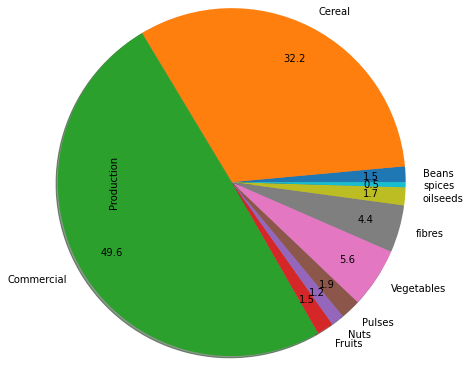

In [29]:
#different percantage of crops category in india.
per_cat=crop_df.groupby(['cat_crop']).sum()
per_cat.plot(kind='pie',y='Production',radius=2,autopct='%1.1f',pctdistance=0.8,shadow=True).get_legend().remove()
plt.show()

Observations:-
* commercial crops has highest production.
* spices has least production.

In [30]:
#creating new dataframe.
area_crop = crop_df.groupby(by='Crop_Year')['Area'].mean().reset_index()
prod_crop = crop_df.groupby(by='Crop_Year')['Production'].sum().reset_index()
crop_df1 = pd.merge(area_crop, prod_crop, right_index = True, left_index = True)
crop_df1.head()

,Crop_Year_x,Area,Crop_Year_y,Production
0,1997,26038.324081,1997,8.512329e+08
1,1998,14795.911383,1998,5.825321e+09
2,1999,12749.174021,1999,6.434666e+09
3,2000,12195.811997,2000,7.449709e+09
4,2001,12434.568019,2001,7.465541e+09


### Rice

In [31]:
#creating new dataframe from existing dataset for analysis.
rice_df = crop_df[crop_df["Crop"]=="Rice"]
rice_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Cereal


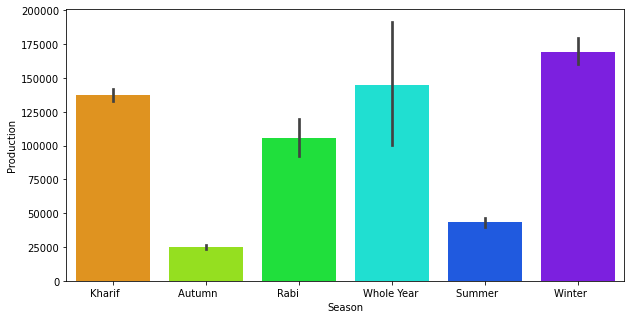

In [32]:
#seasonwise rice production.
plt.figure(figsize=(10,5))
sns.barplot(x = "Season", y = "Production",data=rice_df,palette='gist_rainbow')
plt.show()

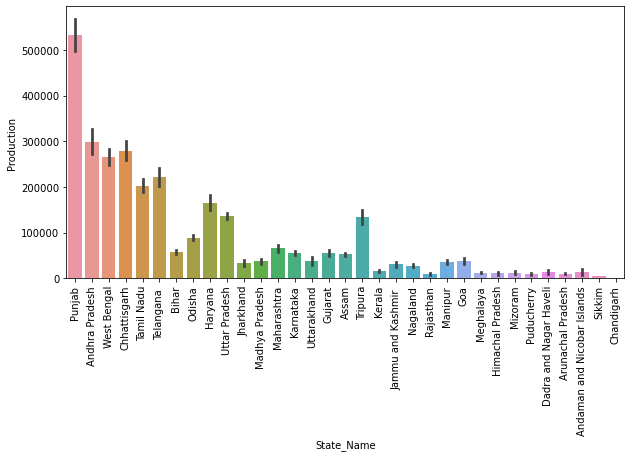

In [33]:
# Statewise-Rice Production:
sort_rice=rice_df.sort_values(by='Production',ascending=False)

#plotting bar graph
plt.figure(figsize=(10,5))
sns.barplot(x= "State_Name",y = "Production",data=sort_rice)
plt.xticks(rotation=90)
plt.show()

* Punjab has the highest rice production in india as compare to other states.
* Sikkim is least rice producer in india.

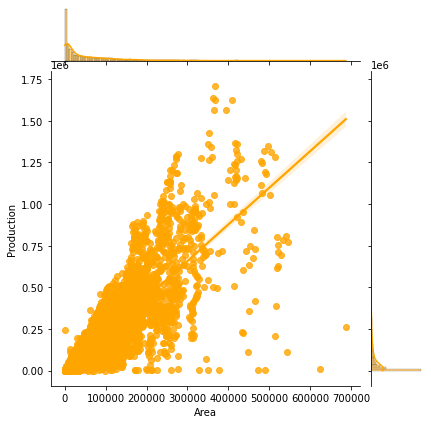

In [34]:
# Area-Wise Rice Production:
sns.jointplot(x = "Area",y = "Production",data=rice_df,kind="reg",color='orange')
plt.show()

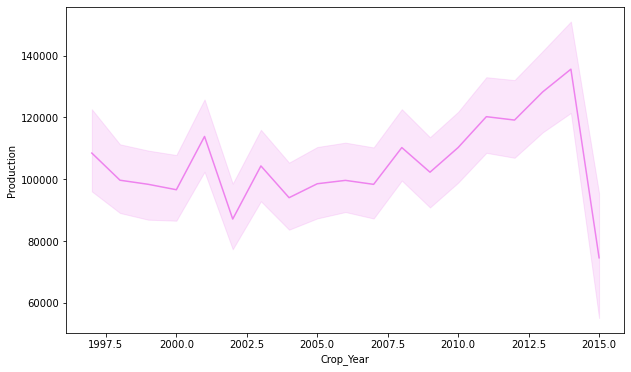

In [35]:
# Rice Production Over the Year:
plt.figure(figsize=(10,6))
sns.lineplot(data=rice_df,x='Crop_Year',y='Production',color='violet')
plt.show()

#### Insight
From Data Visualization: Rice production is mostly depends on Season, Area, State(place).

### Coconut

In [38]:
#creating new dataframe. 
coc_df = crop_df[crop_df["Crop"]=="Coconut "]
coc_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,None
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,None
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,None


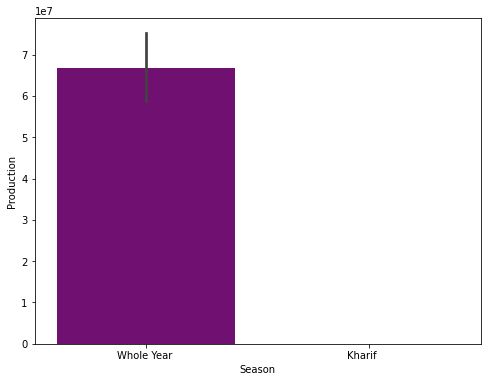

In [39]:
# Sesonal Coconut Production:
plt.figure(figsize=(8,6))
sns.barplot(x= "Season",y="Production",data=coc_df,color='purple')
plt.show()

Coconut can be produced in whole year.

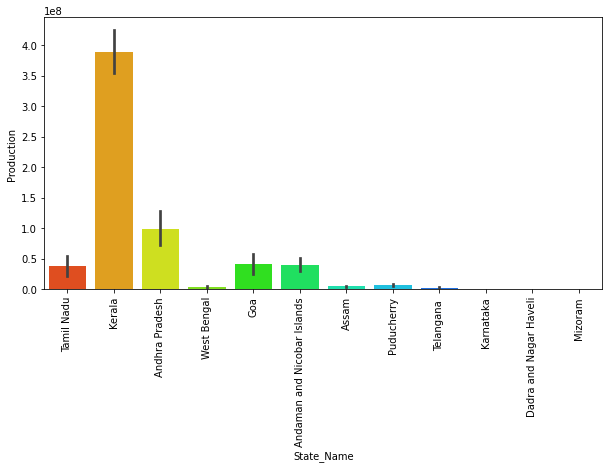

In [40]:
# State-Wise Coconut Production:
coc_sort=coc_df.sort_values(by='Production',ascending=False)

#plotting graph
plt.figure(figsize=(10,5))
sns.barplot(x = "State_Name",y = "Production",data=coc_sort,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

Kerala is the largest producer of coconut in all over the india.

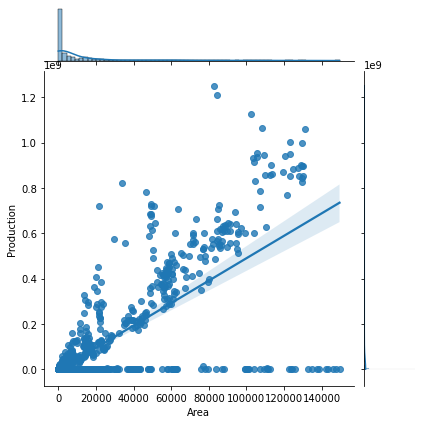

In [41]:
# Area Wise Coconut Production:
sns.jointplot(x= "Area",y = "Production",data=coc_df,kind="reg")
plt.show()

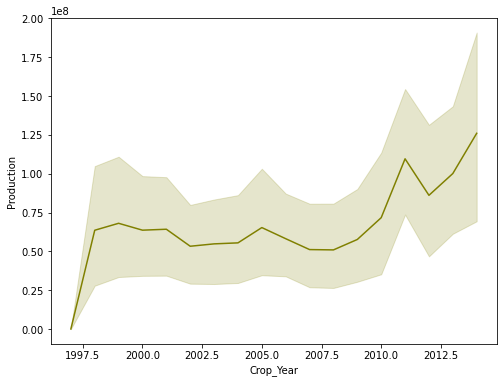

In [42]:
# Cocunut Production Over the Year:
plt.figure(figsize=(8,6))
sns.lineplot(data=coc_df,x='Crop_Year',y='Production',color='olive')
plt.show()

Coconut production is increased with the passage of time it is clearly visible by tha graph.

#### Insight from Cocunut Production
* Cocunut production is directly proportional to area.
* Its production is also gradually increasing over a time of period.
* Production is highin kerala state.
* It does not depends on season.
* Production is Increasing by year

### Sugarcane

In [43]:
#creating new dataframe.
sug_df = crop_df[crop_df["Crop"]=="Sugarcane"]
sug_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Commercial


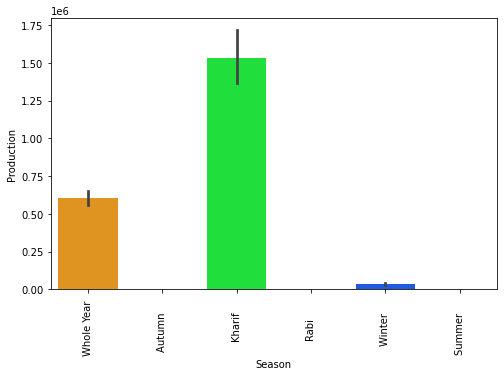

In [44]:
# Sesonal Sugarcane Production:
plt.figure(figsize=(8,5))
sns.barplot(x= "Season",y="Production",data=sug_df,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

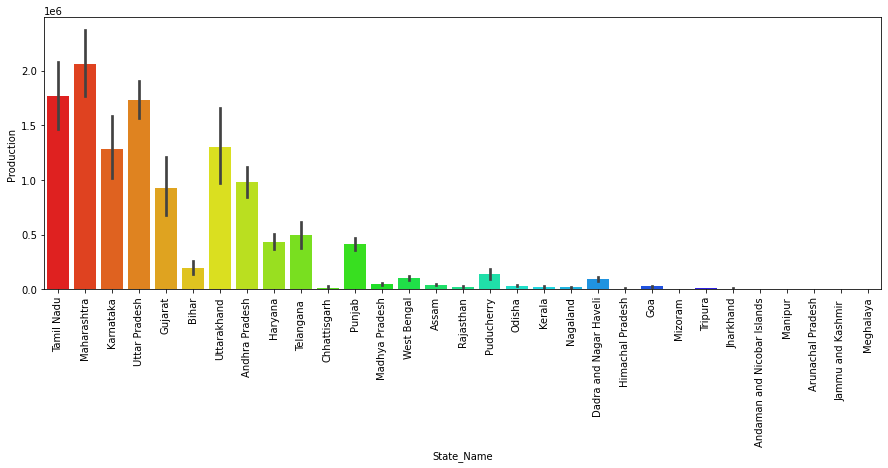

In [45]:
# State Wise Sugarcane Production:
sort_sug=sug_df.sort_values(by='Production',ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x = "State_Name", y = "Production",data=sort_sug,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

<Figure size 360x360 with 0 Axes>

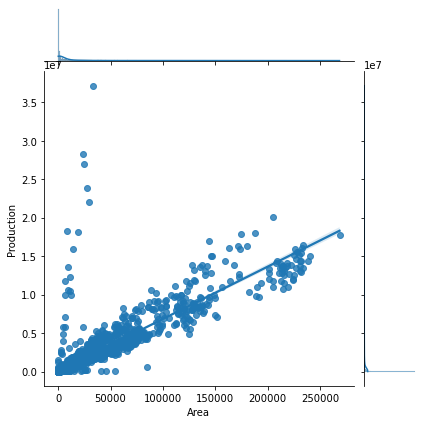

In [46]:
# Area Wise Sugarcane Production:
plt.figure(figsize=(5,5))
sns.jointplot(x= "Area",y = "Production",data=sug_df,kind="reg")
plt.show()

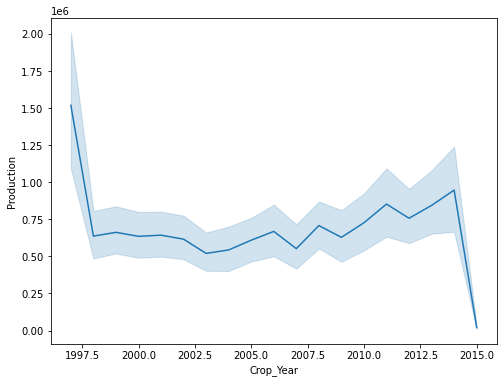

In [47]:
# Sugarcane Production Over the Years:
plt.figure(figsize=(8,6))
sns.lineplot(data=sug_df,x='Crop_Year',y='Production')
plt.show()

### Insight from Sugarcane Production:
* Sugarecane production is directly proportional to area
* And the production is high in some state only
* Production is Decreasing over the Year.

### *  * * * * * * * * * *  * * * * * * *  *  End of Project   * * * * * * * * * * * * * * * * * * 